# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset.head()


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Implementing UCB

In [14]:
import math
N = 10000
d = 10
ads_selected = []
number_of_selections = [0]*d   ## [0,0,0,0,0] == [0]*5
sums_of_rewards = [0]*d
total_reward = 0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d): 
        if(number_of_selections[i] > 0):
            average_reward =sums_of_rewards[i]/number_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/number_of_selections[i]) 
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400 #otroligt stort tal som max för att de alltid ska bli vald (1e400 = etta med 400 nollor)
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = 1
    ads_selected.append(ad)
    number_of_selections[ad] = number_of_selections[ad] + 1 #kan även skriva "number_of_selections+=1" 
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

In [24]:
len(ads_selected)


10002

## Visualising the results

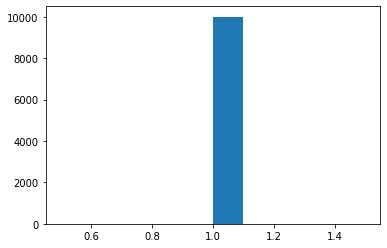

In [27]:
plt.hist(ads_selected)
plt.show()
